In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model


from scipy.stats import linregress

In [2]:
c = 0.000009  # mol/cm3
F = 96485.3329 # C/mol
area = (np.pi * 0.15**2)
rpm = np.array([240, 540, 960, 1500, 2160])
rps = rpm / 60


[[Model]]
    Model(lim_curr)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 5
    # variables        = 1
    chi-square         = 7.7079e-08
    reduced chi-square = 1.9270e-08
    Akaike info crit   = -87.9393489
    Bayesian info crit = -88.3299110
    R-squared          = 0.99137938
##  Warning: uncertainties could not be estimated:
[[Variables]]
    D:  5.2033e-06 (init = 1e-06)
D = 5.203312262169746e-06 cm2/s


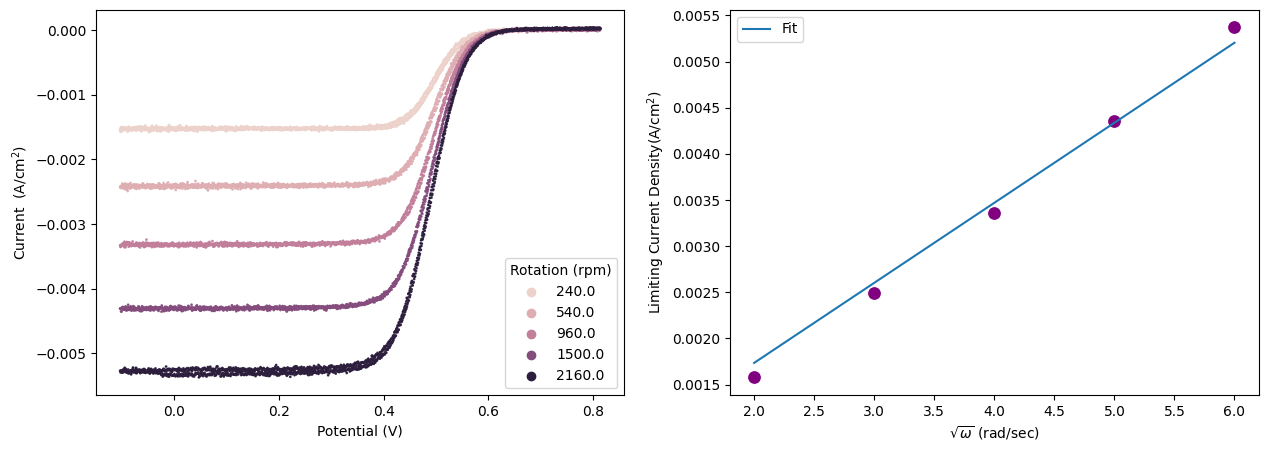

In [3]:
# 6.2

def lim_curr(w, D):
    return 1.544 * F * 0.01**(-1/6) * D**(2/3) * c * w**(1/2)

gmodel = Model(lim_curr)
param = gmodel.make_params()
param['D'].set(value = 1e-6, min = 0)

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Lab\Electrochem Lab\2023\Lab Goup 2\data\6_2.txt'
col = ['Potential (V)',	'Current (A)', 'Current  (A/cm$^2$)', 'Rotation (rpm)','Limiting Current Density(A/cm$^2$)', '$\omega$ (s$^{-1}$)', '$\sqrt{\omega}$ (rad/sec)']
df_result = pd.DataFrame( columns = [col[4], col[3], col[5], col[6]])
df = pd.read_csv(path, sep = '\t')
df[col[2]] = df[col[1]] / area
n = 0
m = 0
row = 1999
for i in rpm:
    df.loc[ n:row, col[3]] = i
    # df_result[col[4]] = min(df.loc[ n:row, col[2]])
    df_result.loc[m] = (-min(df.loc[ n:row, col[2]]), i, rps[m], np.sqrt(rps[m]))
    row += 1999
    n += 1999
    m += 1

# Fit
conv = 1e-22
result = gmodel.fit(df_result[col[4]], param, w = df_result[col[5]], fit_kws={"ftol":conv, "xtol":conv, "gtol":conv})
df_result['Fit'] = list(result.best_fit)
# slope, intercept, rvalue, pvalue, stderr = linregress(df_result[col[6]], df_result[col[4]])
print(result.fit_report())
# Plots
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.scatterplot(data = df, x = col[0], y = col[2], edgecolor = None, s = 3, hue = col[3], ax = ax[0])
sns.scatterplot(data = df_result, x = col[6], y = col[4], s = 100, c = 'purple')
sns.lineplot(data = df_result, x = col[6], y = 'Fit', label = 'Fit')

diffusion_coefficient = result.values['D']
print('D = ' + str(diffusion_coefficient) + ' cm2/s')

,Limiting current$^{-1}$,Rotation$^{-1/2}$
0,-0.697525,0.500000
1,-0.442352,0.333333
2,-0.322449,0.250000
3,-0.250687,0.200000
4,-0.203629,0.166667
5,-0.870937,0.500000
6,-0.568882,0.333333
7,-0.412682,0.250000
8,-0.325179,0.200000
9,-0.269229,0.166667


<AxesSubplot: xlabel='Rotation$^{-1/2}$', ylabel='Limiting current$^{-1}$'>

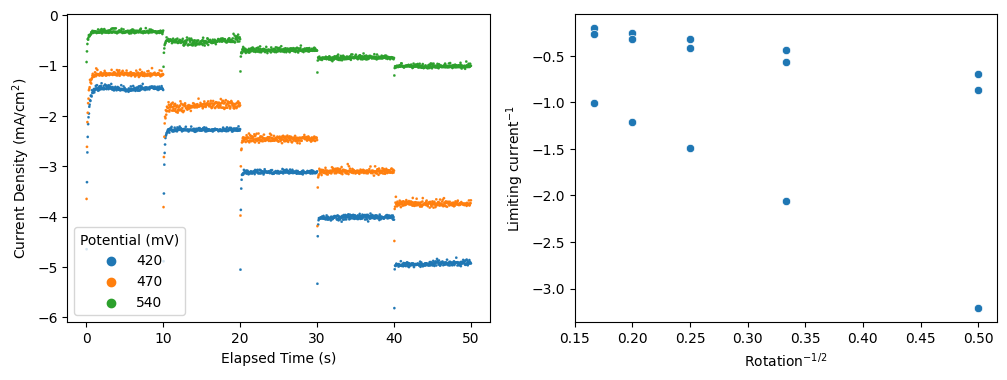

In [109]:
#6.3

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Lab\Electrochem Lab\2023\Lab Goup 2\data'
files = [os.path.join(path, i) for i in os.listdir(path)]
col = ['Current Density (mA/cm$^2$)', 'Current (A)','Potential (mV)', 'Rotation$^{-1/2}$', 'Limiting current$^{-1}$']
df_6 = pd.DataFrame()
for i in files:
     if i[-9:-8] == '3':
        potential = i[-7:-4]  
        df = pd.read_csv(i, sep = '\t')
        df[col[0]] = df[col[1]] * 1000 / area
        df[col[2]] = potential
        df_6 = pd.concat([df_6, df], ignore_index=True)

loc_420 = (df_6.loc[:, col[2]] == '420')
loc_470 = (df_6.loc[:, col[2]] == '470')
loc_540 = (df_6.loc[:, col[2]] == '540')

loc = [loc_420, loc_470, loc_540]

w_m12 = rps**(-1/2)
df_6[col[3]] = None
lim_currents = []
# r = pd.Series(dtype='float64')

indx = 199
zero = 0
while indx < len(df_6):
        for i in rps:
                df_6.loc[zero:indx, col[3]] = i
                condition = df_6.loc[zero:indx, col[0]] > np.median(df_6.loc[zero:indx, col[0]])
                subset = df_6.loc[zero:indx, col[0]][condition]
                lim_c = subset.mean()
                lim_currents.append((1/ lim_c, i**(-1/2)))
                zero += 200
                indx += 200

lim_currents = pd.DataFrame(lim_currents, columns = [col[4], col[3]])
display(lim_currents)

# Plot    
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.scatterplot(data = df_6, x = 'Elapsed Time (s)', y = col[0], hue =col[2], edgecolor = None, s = 3, ax = ax[0])
sns.scatterplot(data = lim_currents, x = col[3], y = col[4])
